In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')


In [2]:
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
229805,0.012467,0.183753,0.044705,0.119618,-0.982998,0.755505,1.051748,0.839044,-1.647398,1.515440,0
55251,-1.099543,-0.875367,0.044705,-1.532451,-0.041081,-1.049090,-1.000477,-0.457834,0.757866,-0.517614,0
41638,-1.099543,-0.941562,0.044705,1.142327,-0.982998,0.755505,1.051748,0.379511,-1.647398,1.539934,0
36405,-1.099543,-0.676782,0.044705,0.119618,1.070422,-1.049090,-1.000477,0.148164,0.738777,1.601171,0
81852,0.957913,-0.081027,0.044705,0.119618,-0.982998,0.755505,1.051748,1.721231,-1.647398,0.890827,0


In [3]:
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
40740,0.957913,0.514728,0.044705,0.119618,1.070422,0.755505,-1.000477,-0.097467,0.223363,0.915322,0
40950,0.957913,-1.073952,0.044705,0.119618,1.070422,-1.049090,-1.000477,10.990222,0.757866,-1.178969,0
21475,0.957913,0.647118,0.044705,0.119618,-0.982998,0.755505,1.051748,0.375648,-1.647398,0.682623,1
11938,-1.099543,0.911898,0.044705,0.119618,1.070422,0.755505,1.051748,-0.242995,-1.647398,0.253967,0
9541,0.957913,0.978093,0.044705,0.434297,-0.982998,0.755505,1.051748,-0.811880,-1.647398,0.670375,1


0    202945
1     27686
Name: Tertarik, dtype: int64


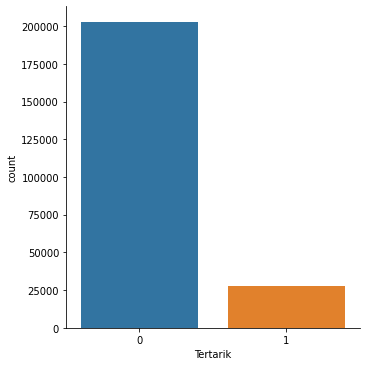

In [4]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [5]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [6]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42, k_neighbors=5)
x_data, y_data = smt.fit_sample(x_data, y_data)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (324712, 10)
x_test shape: (81178, 10)
---------------------------------
y_train shape: (324712,)
y_test shape: (81178,)


## **Tuning Model**

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [11]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=5000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting', 
    'AdaBoost',
    'Random Forest',
    'XGB Classifier'
]


In [12]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [13]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 89.26
Akurasi model Logistic Regression: 78.31
Akurasi model Gradient Boosting: 83.83
Akurasi model AdaBoost: 82.45
Akurasi model Random Forest: 92.47


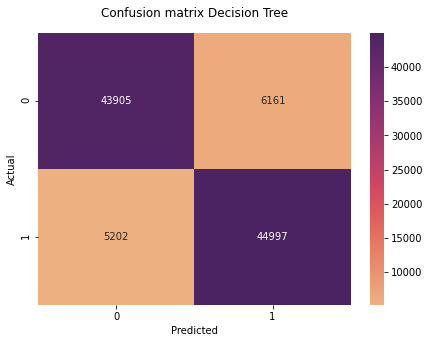


               precision    recall  f1-score   support

           0       0.89      0.88      0.89     50066
           1       0.88      0.90      0.89     50199

    accuracy                           0.89    100265
   macro avg       0.89      0.89      0.89    100265
weighted avg       0.89      0.89      0.89    100265




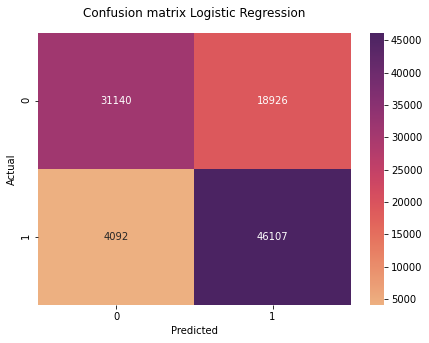


               precision    recall  f1-score   support

           0       0.88      0.62      0.73     50066
           1       0.71      0.92      0.80     50199

    accuracy                           0.77    100265
   macro avg       0.80      0.77      0.77    100265
weighted avg       0.80      0.77      0.77    100265




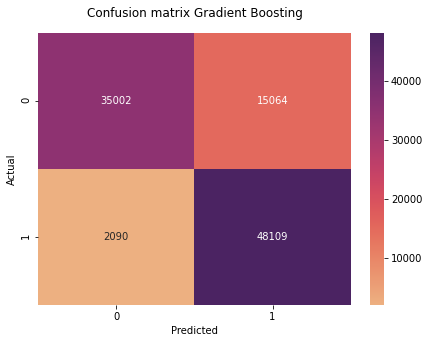


               precision    recall  f1-score   support

           0       0.94      0.70      0.80     50066
           1       0.76      0.96      0.85     50199

    accuracy                           0.83    100265
   macro avg       0.85      0.83      0.83    100265
weighted avg       0.85      0.83      0.83    100265




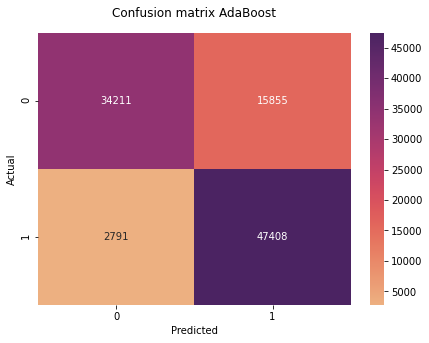


               precision    recall  f1-score   support

           0       0.92      0.68      0.79     50066
           1       0.75      0.94      0.84     50199

    accuracy                           0.81    100265
   macro avg       0.84      0.81      0.81    100265
weighted avg       0.84      0.81      0.81    100265




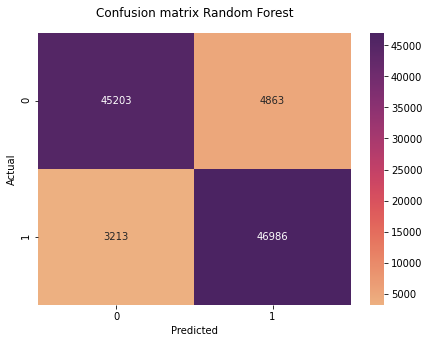


               precision    recall  f1-score   support

           0       0.93      0.90      0.92     50066
           1       0.91      0.94      0.92     50199

    accuracy                           0.92    100265
   macro avg       0.92      0.92      0.92    100265
weighted avg       0.92      0.92      0.92    100265




In [146]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result) 
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

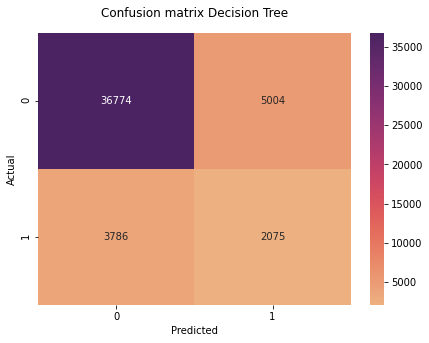


               precision    recall  f1-score   support

           0       0.91      0.88      0.89     41778
           1       0.29      0.35      0.32      5861

    accuracy                           0.82     47639
   macro avg       0.60      0.62      0.61     47639
weighted avg       0.83      0.82      0.82     47639




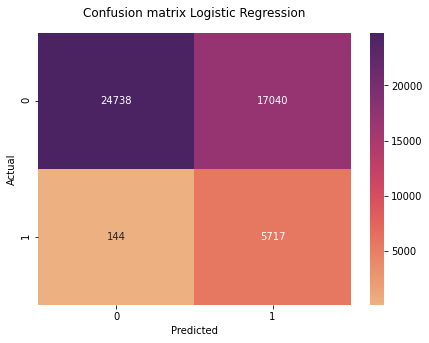


               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639




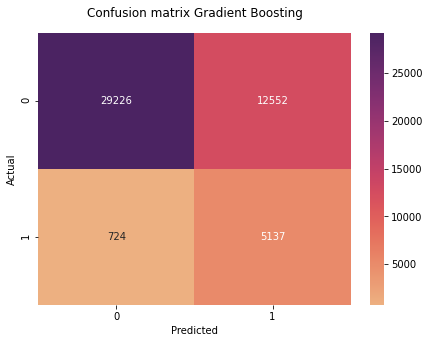


               precision    recall  f1-score   support

           0       0.98      0.70      0.81     41778
           1       0.29      0.88      0.44      5861

    accuracy                           0.72     47639
   macro avg       0.63      0.79      0.63     47639
weighted avg       0.89      0.72      0.77     47639




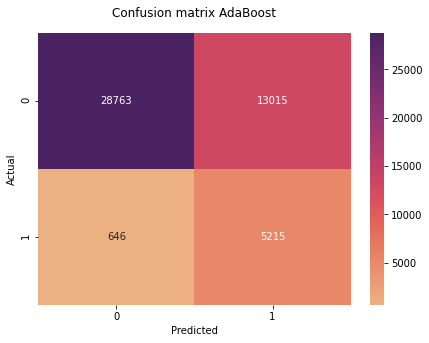


               precision    recall  f1-score   support

           0       0.98      0.69      0.81     41778
           1       0.29      0.89      0.43      5861

    accuracy                           0.71     47639
   macro avg       0.63      0.79      0.62     47639
weighted avg       0.89      0.71      0.76     47639




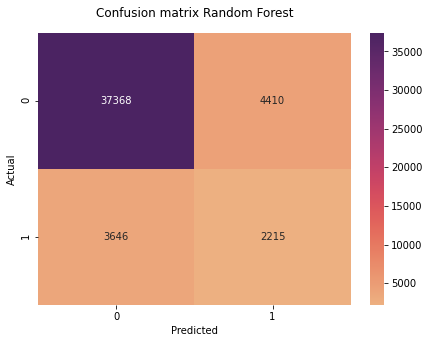


               precision    recall  f1-score   support

           0       0.91      0.89      0.90     41778
           1       0.33      0.38      0.35      5861

    accuracy                           0.83     47639
   macro avg       0.62      0.64      0.63     47639
weighted avg       0.84      0.83      0.84     47639




In [147]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
